### Seaborn library

- Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다. 
- 기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다. 
- 보다 간단한 조작으로 다양한 색상 테마 및 차트를 사용

- sns.lineplot() : 시간 변화에 따른 값의 변화 및 흐름을 시각화
    - sns.lineplot(x, y, data)
        - x : 사용할 x축 데이터
        - y : 사용할 y축 데이터
        - data : 사용할 전체 데이터(data 인자값 전달 시 x, y 인자값으로는 키워드 문자열 전달)
- sns.distplot() : 히스토그램 및 커널밀도추정치(확률밀도함수의 일종)를 한 번에 시각화
    - sns.distplot(x, hist, kde)
        - x : 사용할 데이터
        - hist : 히스토그램 설정 여부, 기본값 = True
        - kde : 확률밀도함수 설정 여부, 기본값 = True
- sns.boxplot() : 각 속성 별로 box-plot 시각화
    - sns.boxplot(x, y, data, by)
        - x : 사용할 x축 데이터
        - y : 사용할 y축 데이터
        - data : 사용할 전체 데이터(data 인자값 전달 시 x, y 인자값으로는 키워드 문자열 전달)
        - by : group_by 기준
- sns.countplot() : 각 카테고리 별로 데이터 개수를 시각화
    - sns.countplot(x, data)
        - x : 카테고리로 사용될 데이터프레임의 열이름
        - data : 사용할 데이터프레임
- sns.barplot() : 카테고리별 수치를 시각화, 값에 대한 비교 용이
    - sns.barplot(x, y, data)
        - x : 사용할 x축 데이터
        - y : 사용할 y축 데이터
        - data : 사용할 전체 데이터(data 인자값 전달 시 x, y 인자값으로는 키워드 문자열 전달)
- sns.pairplot() : 데이터프레임을 인수로 받아 열의 조합에 대해 스캐터 플롯을 그리고 대각선 영역에는 해당 데이터의 히스토그램 시각화
    - sns.pairplot(data)
- sns.heatmap() : 카테고리 값으로 구성된 2차원 데이터에 대한 시각화
    - sns.heatmap(data, annot, fmt)
        - data : 사용할 데이터프레임
        - annot : 값 표기 여부
        - fmt : 값 표기 형식

In [1]:
# 라이브러리 가져오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 데이터 처리 관련 Pandas function

- Series.map(func) : Series 객체에 대해 사용자정의함수 적용
- Series/DataFrame.apply(func) : Series/DataFrame 객체에 대해 사용자정의함수 적용

In [2]:
# map with dict()
# 5행짜리 과일 이름으로 이루어진 Series
s1 = pd.Series(['apple', 'banana', 'apple', 'orange', 'kiwi'])
s1

0     apple
1    banana
2     apple
3    orange
4      kiwi
dtype: object

In [5]:
# mapping 정보를 담고 있는 딕셔너리 생성
dict_map = {'apple':0, 'banana':1, 'kiwi':2, 'orange':3}
dict_map

{'apple': 0, 'banana': 1, 'kiwi': 2, 'orange': 3}

In [6]:
# .map(교환기준)은 딕셔너리 자료를 넣어주면 키값에 매칭된 벨류값으로 교환
s1_2 = s1.map(dict_map)
s1_2

0    0
1    1
2    0
3    3
4    2
dtype: int64

In [7]:
# map에 람다함수를 이용할 수 있음
s1.map(lambda x : len(x))

0    5
1    6
2    5
3    6
4    4
dtype: int64

In [8]:
# apply 활용하기
s2 = pd.Series([1, 2, 3, 4, 5])
s2.apply(np.sqrt)

0    1.000000
1    1.414214
2    1.732051
3    2.000000
4    2.236068
dtype: float64

In [9]:
# 4x2 구조에서 모든 값이 1인 데이터프레임 생성
d1 = pd.DataFrame(np.ones((4, 2)))
d1

,0,1
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0


In [10]:
# 내장함수 적용
d1.sum()

0    4.0
1    4.0
dtype: float64

In [11]:
# apply 역시 내부 요소에 대해 함수를 이용한 연산을 진행함
d1.apply(sum)

0    4.0
1    4.0
dtype: float64

In [13]:
# axis = 0(디폴트) => 행 기준으로 함수 수행 => 열 기준으로 계산한 결과
d1.apply(sum, axis=0)

0    4.0
1    4.0
dtype: float64

In [14]:
# axis=1 = 같은 열에 있는 자료끼리 합산
d1.apply(sum, axis=1)

0    2.0
1    2.0
2    2.0
3    2.0
dtype: float64

In [15]:
# 사각형의 가로, 세로 길이를 저장하고 있는 데이터프레임 생성
# 컬럼 : height, width
# 로우 : 3개
data = {'height':[10, 20, 30],
       'width':[3, 4, 5]}
df = pd.DataFrame(data)
df

,height,width
0,10,3
1,20,4
2,30,5


In [16]:
# 사각형의 면적을 구해주는 사용자함수 정의
# 면적 = 가로 * 세로
def area(row):
    return row['height'] * row['width']

In [17]:
# apply 함수에서 axis=1일때 사용자 정의 함수가 접근하는 대상 : 한 행(전체 컬럼)
df.apply(area, axis=1)

0     30
1     80
2    150
dtype: int64

In [18]:
# 함수 적용 결과를 새로운 컬럼으로 저장
# 'area'라는 컬럼을 만든렁 거기에 함수의 결과물을 저장
df['area'] = df.apply(area, axis=1)
df

,height,width,area
0,10,3,30
1,20,4,80
2,30,5,150


#### 데이터 변환하기

In [19]:
# 배열 타입의 데이터를 데이터프레임으로 변환하여 최종 데이터로 생성하기
from sklearn.datasets import load_iris   # 배열 타입 데이터
# sns.load_iris() : 완성된 df 형태의 데이터
# 1. iris = load_iris()
# 2. data, target 값을 분리해서 변수로 할당하되 target은 2차원 데이터로 생성(150행 1열)
# 3. numpy 함수를 이용하여 data, target을 열 방향으로 합치기
# 4. 3번 데이터를 이용하여 dataframe 생성, 컬럼이름도 동시에 생성
# 5. 품종(species)은 문자타입으로 최종 변환(0=setosa, 1=versicolor, 2=virginica)
# 5번에서 map, apply 함수 사용
# 6. 컬럼명 변경 : (cm) 제거, 공백 제거

In [20]:
iris = load_iris()

In [21]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [22]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
# data, target
x = iris['data']
y = iris['target']

In [24]:
type(x)

numpy.ndarray

In [25]:
type(y)

numpy.ndarray

In [27]:
# y가 데이터프레임 내부에서 하나의 컬럼으로 사용될 값
# x와 컬럼 방향으로(가로길이 1 증가) 결합
# 1차원(150개) -> 2차원(150, 1)로 변환
print(x.shape, y.shape)
y = y.reshape(150, 1)
print(y.shape)

(150, 4) (150,)
(150, 1)


In [28]:
# x에 y를 붙여주기 => np.hstack
data = np.hstack((x, y))
data

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [29]:
data.shape

(150, 5)

In [30]:
df = pd.DataFrame(data)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [31]:
# 컬럼 이름 가져오기
iris.keys()
cols = iris['feature_names'] + ['species']

In [36]:
# cols를 이용해 컬럼이름 바꾸기
df.columns = cols
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [37]:
# map과 dict자료를 이용해 species 컬럼 내부의 값을 붓꽃 종 이름으로 변환
species_map = {0.0:'setosa', 1.0:'versicolor', 2.0:'virginica'}
species_map

{0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'}

In [40]:
# species_map을 이용해서 df.species 컬럼 내부의 자료를 전부 숫자에서 종이름으로 바꾸기
df['species'] = df['species'].map(species_map)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
# 컬럼명에서 ' (cm)' 없애기.
# 띄어쓰기는 전부 _ 로 교체
# df.rename({old_colname:new_colname})
for col in df.columns:
    new_col = col.replace(' (cm)', "")
    new_col = new_col.replace(' ', '_')
    df.rename({col:new_col}, axis=1, inplace=True)

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 데이터 탐색하기

In [43]:
# 수치형 변수의 기술통계값 확인
# df.describe() : 기본동작 => 수치형 변수에 대한 결과만 반환
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
# 수치데이터가 아닌 컬럼에 대한 기술통계값 확인
df.describe(include=['object'])

,species
count,150
unique,3
top,virginica
freq,50


In [45]:
# 모든 변수의 기술통계값 확인
df.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [50]:
# 샘플데이터로 사용할 데이터 추출
# 품종 컬럼을 제외한 모든 컬럼에 대해 1행 데이터만 추출
df.head()
sample = df.drop('species', axis=1)[:1].values.reshape(4,)

In [51]:
sample

array([5.1, 3.5, 1.4, 0.2])

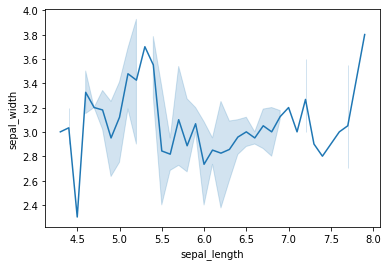

In [53]:
# line plot
# sns.lineplot(x=[1, 2, 3, 4], y=sample)
sns.lineplot(x='sepal_length', y='sepal_width', data=df)

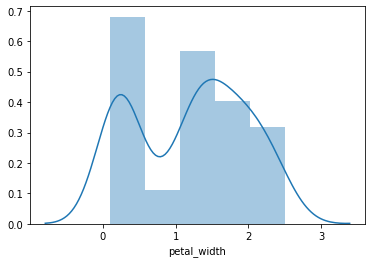

In [55]:
# distplot
# petal_width 값에 대한 히스토그램과 확률밀도함수
sns.distplot(df['petal_width'])

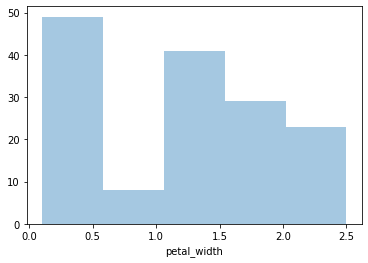

In [56]:
# 확률밀도함수 제외하고 히스토그램만 시각화
# kde = False
sns.distplot(df.petal_width, kde=False)

### subplots in Seaborn

- sns.distplot(..., ax=axes[m,n])
    - axes 객체 생성해서 subplot 사용하는 방식
- plt.subplot(r,c,i)
    - subplot 단독 생성해서 사용하는 방식

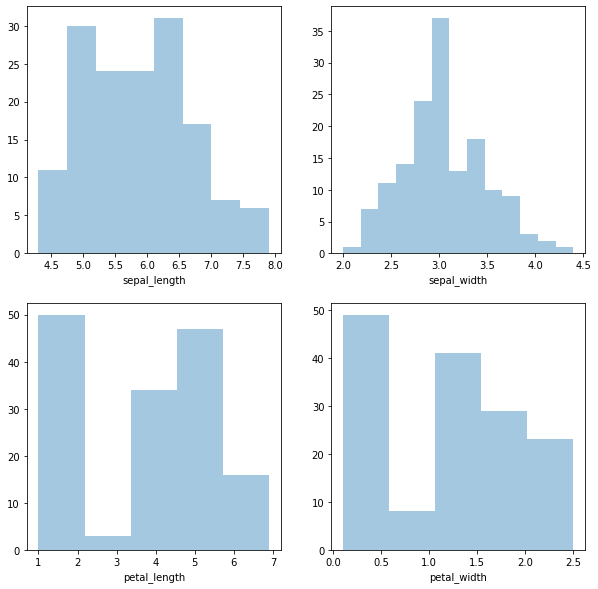

In [57]:
# subplot 단독으로 생성해서 각 속성별 distplot 그리기(히스토그램만)
# 2 x 2
# 좌상단 : SepalLengthCm
# 우상단 : SepalWidthCm
# 좌하단 : PetalLengthCm
# 우하단 : PetalWidthCm
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
sns.distplot(df.sepal_length, kde=False)

plt.subplot(2, 2, 2)
sns.distplot(df.sepal_width, kde=False)

plt.subplot(2, 2, 3)
sns.distplot(df.petal_length, kde=False)

plt.subplot(2, 2, 4)
sns.distplot(df.petal_width, kde=False)

In [58]:
# count plot
# 종별 데이터 개수 => 각 종마다 50개의 데이터
# value_counts : 범주형 데이터에 대해 각 범주의 데이터 개수를 반환
tmp = df.species.value_counts()
tmp

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

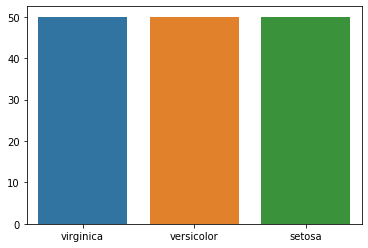

In [59]:
sns.barplot(x=tmp.index, y=tmp.values)

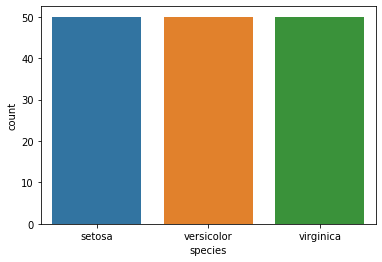

In [60]:
# x축에 갯수를 세고 싶은 자료가 있는 컬럼을 지정해주면 됨
sns.countplot(x='species', data=df)

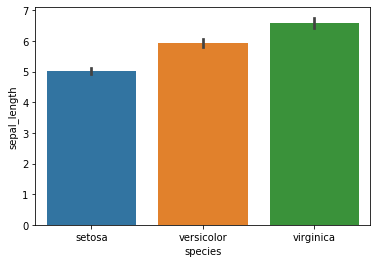

In [61]:
# bar plot
# 종별 Sepal_length 비교
sns.barplot(x='species', y='sepal_length', data=df)